## Workspace - Sarah ##

In [79]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
# Load Data
nutrition = pd.read_csv('../data/Nutrition.csv')

In [81]:
# Copy for Cleaning
nutrition_1 = nutrition.copy()
#nutrition_1.info()

In [82]:
# Percent of Adults who Engage in No Leisure-Time Physical Activity - Investigate and Start Cleaning

# Filter df to no leisure time physical activity, excluding sample size too small, only include Income rows
no_lesisure = (nutrition_1[nutrition_1['Question'] == 'Percent of adults who engage in no leisure-time physical activity'])
no_lesisure = (no_lesisure[no_lesisure['Data_Value_Footnote_Symbol'] != '~'])
no_lesisure = (no_lesisure[no_lesisure['StratificationCategoryId1'] == 'INC'])

# Keep only Year, Percent, and Income Level. Rename Income Level Column
no_lesisure = no_lesisure[['YearStart', 'Data_Value','Stratification1']]
no_lesisure.rename(columns ={'Stratification1' : 'Income_Range'}, inplace= True)

# Average the Percent of No Lesiure individuals by Year and Income:
grouped_no_lesire = no_lesisure.groupby(['YearStart','Income_Range'])['Data_Value'].mean().reset_index()

# Info: No Leisure by Income:
grouped_no_lesire.info()

# No Lesiure by Income Print:
print("\n","View: Average No Leisure by Year and Income:","\n",grouped_no_lesire)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearStart     91 non-null     int64  
 1   Income_Range  91 non-null     object 
 2   Data_Value    91 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ KB

 View: Average No Leisure by Year and Income: 
     YearStart        Income_Range  Data_Value
0        2011   $15,000 - $24,999   33.398077
1        2011   $25,000 - $34,999   29.407692
2        2011   $35,000 - $49,999   25.611538
3        2011   $50,000 - $74,999   21.878846
4        2011  $75,000 or greater   15.938462
..        ...                 ...         ...
86       2023   $35,000 - $49,999   28.626415
87       2023   $50,000 - $74,999   23.226415
88       2023  $75,000 or greater   18.550943
89       2023   Data not reported   20.260377
90       2023   Less than $15,000   41.569811

[91 rows x 3 column

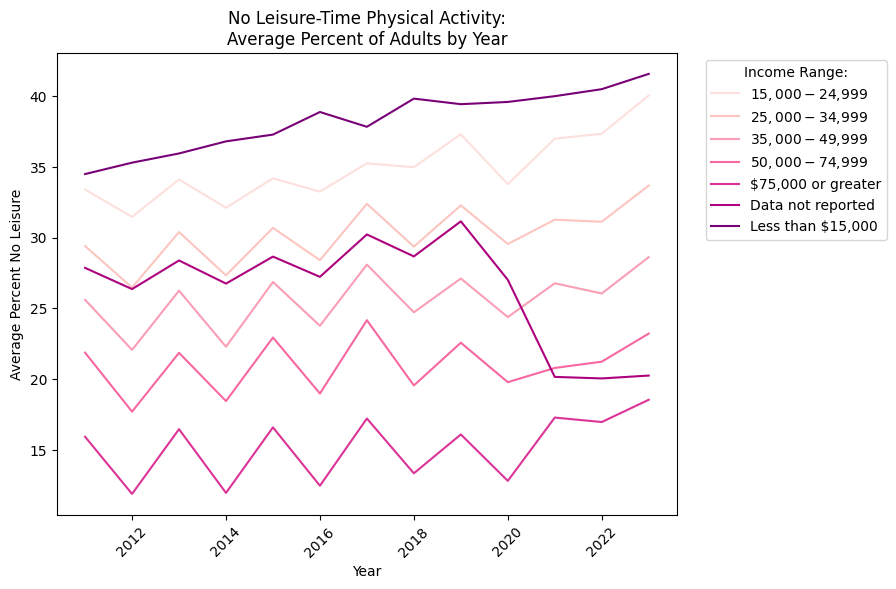

In [101]:
# Graph Lineplot of No Leisure Time Physical Activity by Year and Income Range:
plt.figure(figsize=(8, 6))
mypal = sns.color_palette('RdPu', 7)
Lineplot_1 =  sns.lineplot(data=grouped_no_lesire, x = 'YearStart', y = 'Data_Value', hue = 'Income_Range', palette=mypal)
plt.xlabel('Year')
plt.ylabel('Average Percent No Leisure')
plt.title('No Leisure-Time Physical Activity:\nAverage Percent of Adults by Year')
plt.xticks(rotation=45)
plt.legend(title='Income Range:', loc = 'upper right', bbox_to_anchor = (1.35,1))
plt.show()
